In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import numpy as np

params = {'legend.fontsize': 15,
         'axes.labelsize': 24 + 2,
         'axes.titlesize': 26 + 2,
         'xtick.labelsize': 22 + 2,
         'ytick.labelsize': 22 + 2}
plt.rcParams.update(params)


sns.set_style("whitegrid")

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Palatino"
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
print(os.getenv("PATH"))

%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/jiet/.nvm/versions/node/v21.7.1/bin:/home/jiet/neovim/bin:/home/jiet/code/TBAL/env/bin:/home/jiet/neovim/bin:/home/jiet/anaconda3/bin:/home/jiet/anaconda3/bin:/home/jiet/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/Library/TeX/texbin


In [2]:
color_map = {'auto_label_opt_v0': '#A12230',
            'dirichlet': '#FB75AF',
            'histogram_binning_top_label': '#000000',
            'scaling_binning': '#306689',
            'temp_scaling': '#88548E',
            'nan': '#7BC276'} # 4F7152

marker_map = {'auto_label_opt_v0': '*',
            'dirichlet': 'o',
            'histogram_binning_top_label': '^',
            'scaling_binning': 's',
            'temp_scaling': 'd',
            'nan': 'P'}

legend_map = {'auto_label_opt_v0': "Ours",
            'dirichlet': 'Dirichlet',
            'histogram_binning_top_label': 'Top-HB',
            'scaling_binning': 'SB',
            'temp_scaling': 'TS',
            'nan': 'Softmax'}

In [3]:
fontsize=18
markersize=12
linewidth=2.0

In [4]:
def plot_ablation(ax, X_axis, Y_axis, std_axis, X_label=None, Y_label=None, n=110000):
    if X_label is None:
        X_label = X_axis
    
    if Y_label is None:
        Y_label = Y_axis
    df_sorted = df.sort_values(by=[X_axis])
    for calib_conf, group in df_sorted.groupby('calib_conf'):
        # if calib_conf == 'auto_label_opt_v0' and X_axis == 'N_t':
        #     index_5000 = group[group[f'{X_axis}'] == 5000].index[0]
        #     ax.errorbar(group[f'{X_axis}'][index_5000], group[f'{Y_axis}'][index_5000], 
        #                 yerr=group[f'{std_axis}'][index_5000], 
        #                 label=legend_map[calib_conf], marker=marker_map[calib_conf], 
        #                 linestyle='None', color=color_map[calib_conf],
        #                 markersize=markersize, linewidth=linewidth)
        #     # ax.text(group[f'{X_axis}'][index_5000], group[f'{Y_axis}'][index_5000] + 2, 
        #     #         f'{group[f"{X_axis}"][index_5000]}', ha='center', va='bottom',
        #     #          color=color_map[calib_conf])
        # elif calib_conf == 'auto_label_opt_v0' and X_axis in ['N_v', 'calib_val_frac']:
        #     # Error bar plot!
        #     #ax.errorbar(group[f'{X_axis}'], group[f'{Y_axis}'], yerr=group[f'{std_axis}'], label=calib_conf, marker='o')
        #     ax.plot(group[f'{X_axis}'], group[f'{Y_axis}'], label=legend_map[calib_conf], 
        #             marker=marker_map[calib_conf], color=color_map[calib_conf],
        #             markersize=markersize, linewidth=linewidth)
        #     ax.fill_between(group[f'{X_axis}'], group[f'{Y_axis}'] - group[f'{std_axis}'], 
        #                     group[f'{Y_axis}'] + group[f'{std_axis}'], alpha=0.2, 
        #                     color=color_map[calib_conf])
        # else:
        ax.plot(group[f'{X_axis}'], group[f'{Y_axis}'], label=legend_map[calib_conf], 
                marker=marker_map[calib_conf], color=color_map[calib_conf],
                markersize=markersize, linewidth=linewidth)
        ax.fill_between(group[f'{X_axis}'], group[f'{Y_axis}'] - group[f'{std_axis}'], 
                        group[f'{Y_axis}'] + group[f'{std_axis}'], alpha=0.2, 
                        color=color_map[calib_conf])
        # ax.set_xticks(group[f'{X_axis}'][::1])
        # ax.set_xticklabels(group[f'{X_axis}'][::1], rotation=45, ha='right')
        
        prop = n 
        ax.set_xticks(group[f'{X_axis}'][::1])
        if prop is not None:
            ax.set_xticklabels(list(map(lambda x: f"{int(round(x,2) * 100)}\%", np.array(group[f'{X_axis}'][::1]) / prop)))
        
        ax.set_xlabel(X_label, fontsize=fontsize)
        ax.set_ylabel(Y_label, fontsize=fontsize)
        # ax.set_title(f'{Y_axis} vs {X_axis}', fontsize=fontsize)
        # ax.legend(fontsize=fontsize, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(df['calib_conf'].unique()))
        ax.grid(True, linestyle='--', alpha=0.7)  
        # ax.set_facecolor('lightgray')

        for spine in ax.spines.values():
            spine.set_linewidth(2)
        
        # ax.xticks(fontsize=fontsize)
        # ax.yticks(fontsize=fontsize)
        ax.tick_params(axis='both', which='major', labelsize=fontsize)

        # plt.savefig(f'{X_axis}_{Y_axis}.png', dpi=1600, bbox_inches='tight')
        # plt.savefig(f'{X_axis}_{Y_axis}.pdf', dpi=1600)

In [5]:
# filename = "N_t_exp.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nt_tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full__03-24-2024__11-00-31.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nt.xlsx"
filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nt_inc_seed.xlsx"

df = pd.read_excel(filename)


calib_conf_order = ['auto_label_opt_v0',
            'dirichlet',
            'histogram_binning_top_label',
            'scaling_binning',
            'temp_scaling',
            'nan']

# tab20 color map
tab20_colors = plt.cm.get_cmap('tab10').colors
color_map = {str(calib_conf): to_rgba(tab20_colors[i % len(tab20_colors) + 1]) 
            for i, calib_conf in enumerate(calib_conf_order)}
# color_map['histogram_binning_top_label'] = (128/256,128/256,128/256,1)
color_map['histogram_binning_top_label'] = (0/256,0/256,255/256,1)

/tmp/ipykernel_219695/963351927.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20_colors = plt.cm.get_cmap('tab10').colors


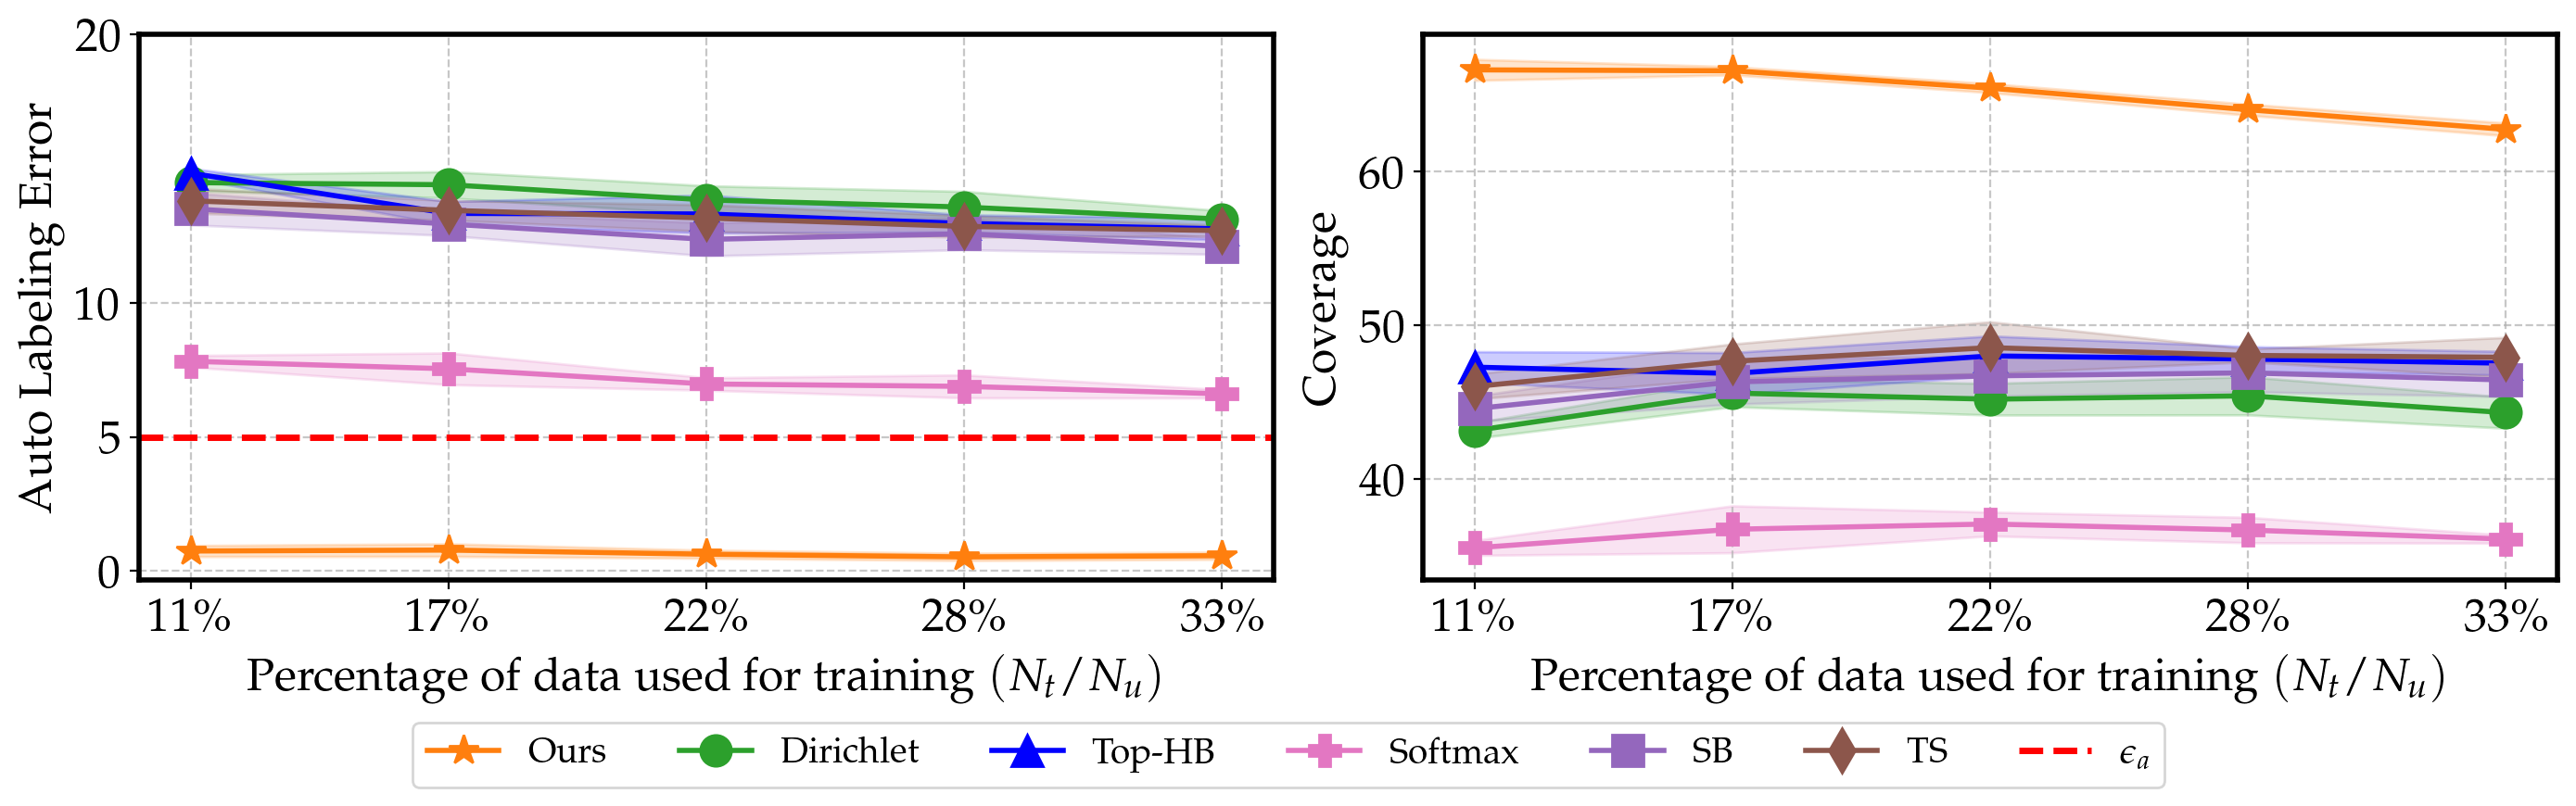

In [6]:
# filename = "N_t_exp.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nt.xlsx"
filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nt_inc_seed.xlsx"

df = pd.read_excel(filename)

df.calib_conf = df.calib_conf.fillna('nan')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# plot_ablation(ax1, "N_t", "Auto-Labeling-Err-Mean", "Auto-Labeling-Err-Std", X_label="$N_t$", Y_label="Auto Labeling Error", n =90000)
# plot_ablation(ax2, "N_t", "Coverage-Mean", "Coverage-Std", X_label="$N_t$", Y_label="Coverage", n=90000)
plot_ablation(ax1, "N_t", "Auto-Labeling-Err-Mean", "Auto-Labeling-Err-Std", X_label="Percentage of data used for training $(N_t / N_u)$", Y_label="Auto Labeling Error", n =90000)
plot_ablation(ax2, "N_t", "Coverage-Mean", "Coverage-Std", X_label="Percentage of data used for training $(N_t / N_u)$", Y_label="Coverage", n=90000)

ax1.axhline(y = 5, color = 'r', linestyle = 'dashed', label='$\epsilon_a$', linewidth=2.5) 
ax1.set_yticks([0, 5, 10, 20])

handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    fontsize=fontsize - 4,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(df["calib_conf"].unique()) + 1 ,
)

plt.tight_layout()

# plt.savefig('Nt.png', dpi=1600, bbox_inches='tight')
plt.savefig("Nt.png", dpi=300, bbox_inches="tight")
plt.show()

Calib val frac

In [7]:
# filename = "calib_val_frac.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv.xlsx"
filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv_inc_seed.xlsx"

df = pd.read_excel(filename)
df.columns

Index(['Unnamed: 0', 'calib_conf', 'training_conf', 'C_1', 'N_t', 'N_v',
       'N_hyp_v', 'Auto-Labeling-Err-Mean', 'Coverage-Mean',
       'Avg-ECE-Val-Mean', 'Auto-Labeling-Err-Std', 'Coverage-Std',
       'Avg-ECE-Val-Std', 'alpha_1', 'batch_size', 'calib_val_frac',
       'class_wise', 'eps', 'features_key', 'l1', 'l2', 'l3', 'learning_rate',
       'lr_g', 'max_epochs', 'method', 'model_conf', 'momentum', 'num_runs',
       'optimizer', 'points_per_bin', 'query_batch_frac', 'regularize',
       'seed_frac', 'training_conf.batch_size', 'training_conf.learning_rate',
       'training_conf.max_epochs', 'training_conf.num_bins',
       'training_conf.optimier', 'training_conf.optimizer',
       'training_conf.reg', 'training_conf.weight_decay',
       'training_conf_g.batch_size', 'training_conf_g.max_epochs',
       'training_conf_g.optimizer', 'training_conf_g.weight_decay',
       'weight_decay'],
      dtype='object')

In [8]:
# filename = "calib_val_frac.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv.xlsx"

# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv_inc_seed.xlsx"

# df = pd.read_excel(filename)
# df.calib_conf = df.calib_conf.fillna('nan')

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# plot_ablation(ax1, 'calib_val_frac', "Auto-Labeling-Err-Mean", "Auto-Labeling-Err-Std", X_label=r"$\nu$", Y_label="Auto Labeling Error")
# plot_ablation(ax2, 'calib_val_frac', "Coverage-Mean", "Coverage-Std", X_label=r"$\nu$", Y_label="Coverage")

# ax1.axhline(y = 5, color = 'r', linestyle = 'dashed', label='$\epsilon_a$', linewidth=2.5) 
# ax1.set_yticks([0, 5, 10, 20])

# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, fontsize=fontsize - 4, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df['calib_conf'].unique()) + 1)

# plt.tight_layout()

# # plt.savefig('Nt.png', dpi=1600, bbox_inches='tight')
# plt.savefig('calib_val_frac.png', dpi=300, bbox_inches='tight')
# plt.show()

N_v

In [9]:
# filename = "N_v.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv.xlsx"
filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv_inc_seed.xlsx"

df = pd.read_excel(filename)
df.columns

Index(['Unnamed: 0', 'calib_conf', 'training_conf', 'C_1', 'N_t', 'N_v',
       'N_hyp_v', 'Auto-Labeling-Err-Mean', 'Coverage-Mean',
       'Avg-ECE-Val-Mean', 'Auto-Labeling-Err-Std', 'Coverage-Std',
       'Avg-ECE-Val-Std', 'alpha_1', 'batch_size', 'calib_val_frac',
       'class_wise', 'eps', 'features_key', 'l1', 'l2', 'l3', 'learning_rate',
       'lr_g', 'max_epochs', 'method', 'model_conf', 'momentum', 'num_runs',
       'optimizer', 'points_per_bin', 'query_batch_frac', 'regularize',
       'seed_frac', 'training_conf.batch_size', 'training_conf.learning_rate',
       'training_conf.max_epochs', 'training_conf.num_bins',
       'training_conf.optimier', 'training_conf.optimizer',
       'training_conf.reg', 'training_conf.weight_decay',
       'training_conf_g.batch_size', 'training_conf_g.max_epochs',
       'training_conf_g.optimizer', 'training_conf_g.weight_decay',
       'weight_decay'],
      dtype='object')

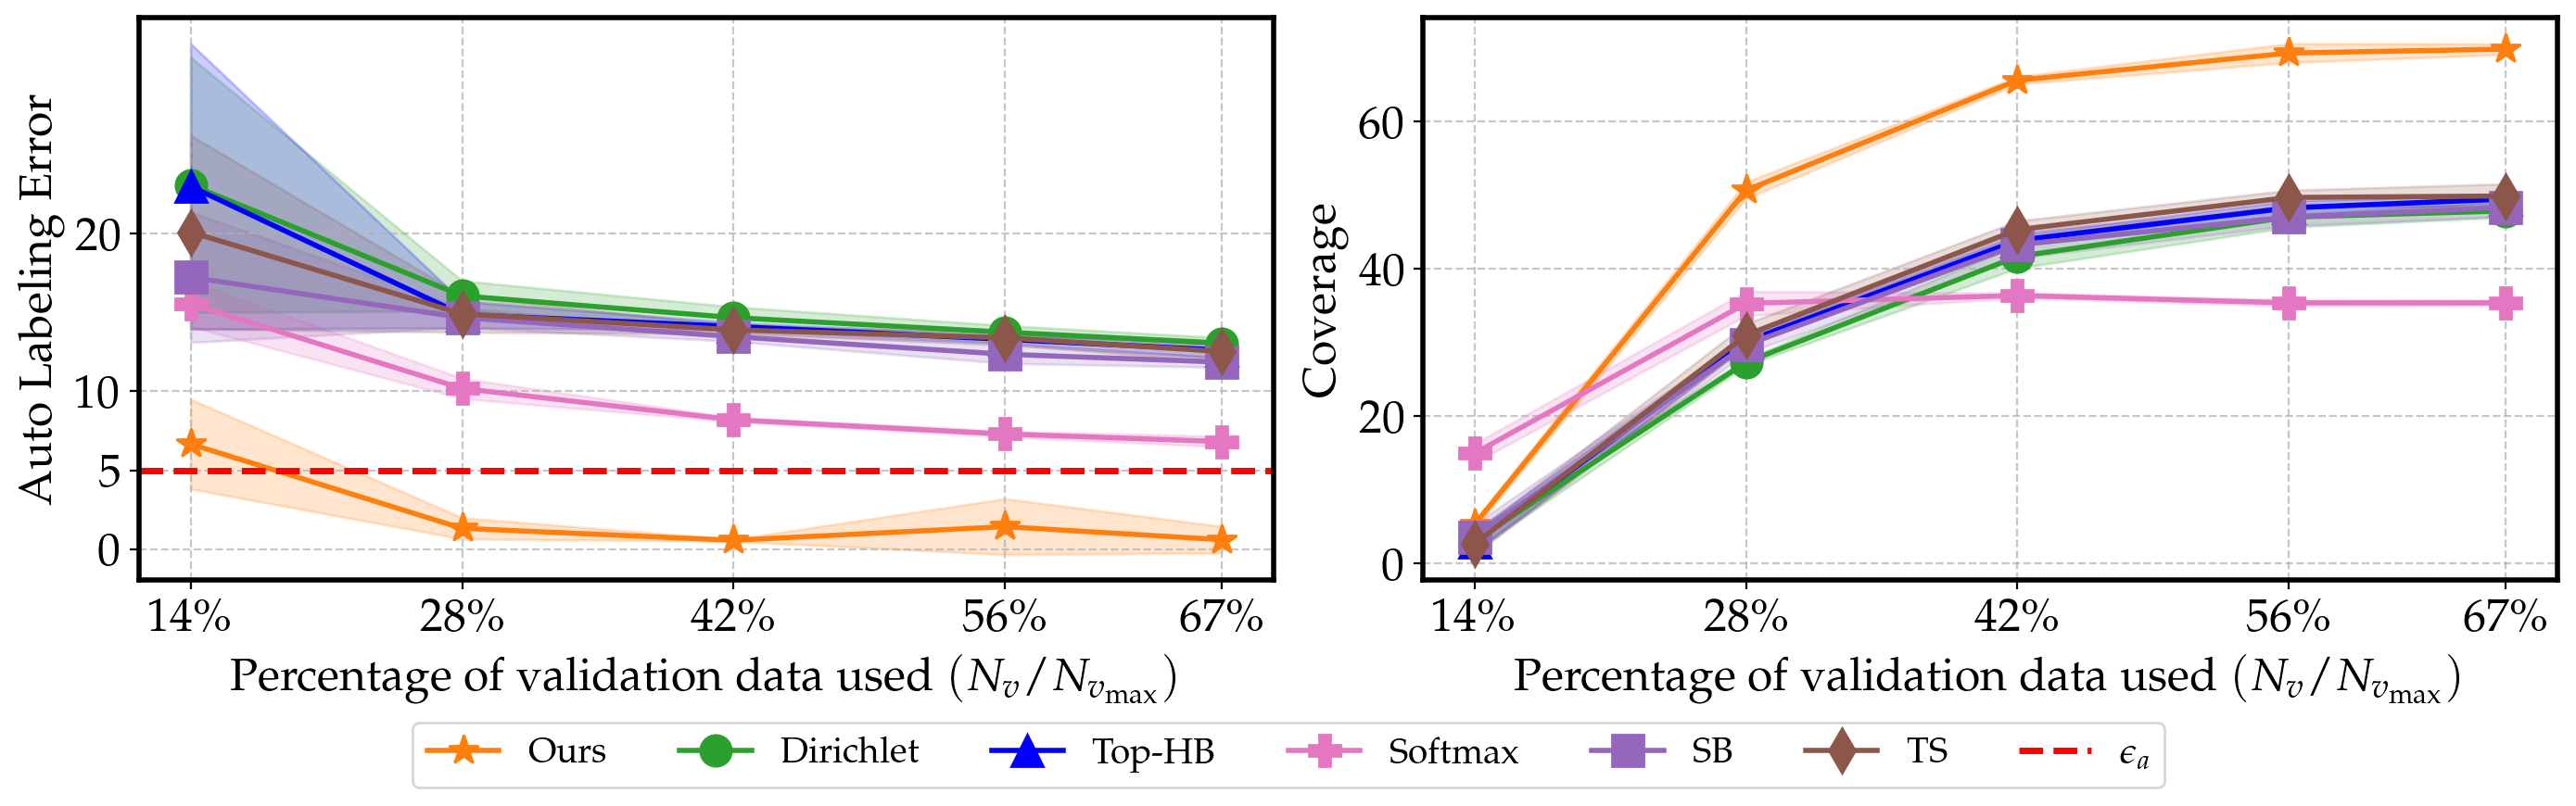

In [10]:
# filename = "N_v.xlsx"
# filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv.xlsx"
filename = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/vary_nv_inc_seed.xlsx"

df = pd.read_excel(filename)
df.calib_conf = df.calib_conf.fillna('nan')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

plot_ablation(ax1, 'N_v', "Auto-Labeling-Err-Mean", "Auto-Labeling-Err-Std", X_label="Percentage of validation data used $(N_v / N_{v_\mathrm{max}})$", Y_label="Auto Labeling Error", n =18000)
plot_ablation(ax2, 'N_v', "Coverage-Mean", "Coverage-Std", X_label="Percentage of validation data used $(N_v / N_{v_\mathrm{max}})$", Y_label="Coverage", n = 18000)

# uniq = df['N_v'].unique()
# ax1.plot(uniq.tolist(), np.full(uniq.shape, 5))

ax1.axhline(y = 5, color = 'r', linestyle = 'dashed', label='$\epsilon_a$', linewidth=2.5) 
ax1.set_yticks([0, 5, 10, 20])


handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=fontsize - 4, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df['calib_conf'].unique()) + 1)

plt.tight_layout()

plt.savefig('N_v.png', dpi=300, bbox_inches='tight')
plt.show()